In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
import seaborn as sn

In [2]:
train = pd.read_csv('data/train.csv', names=list(map(str, range(56))))

In [3]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,447095,3452,111,22,433,214,3677,252,210,74,...,0,0,0,0,0,0,0,1,0,0
1,113427,3093,95,9,124,7,4115,234,227,124,...,0,0,0,0,0,0,0,0,0,1
2,66435,2551,61,17,90,5,726,231,202,98,...,0,0,0,0,0,0,0,0,0,1
3,8957,2944,135,3,430,13,1868,224,238,149,...,0,0,0,0,0,0,0,0,0,1
4,434631,3030,327,34,277,101,1973,120,181,190,...,0,1,0,0,0,0,0,0,0,1


In [38]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
count,406709.000000,406709.000000,406709.000000,406709.000000,406709.000000,406709.000000,406709.000000,406709.000000,406709.000000,406709.000000,...,406709.000000,406709.000000,406709.000000,406709.000000,406709.000000,406709.000000,406709.000000,406709.000000,406709.000000,406709.000000
mean,290590.177164,2959.547492,155.865518,14.099390,269.789478,46.520906,2351.535781,212.115648,223.336223,142.591322,...,0.089951,0.077975,0.002756,0.003204,0.000221,0.000479,0.026953,0.023712,0.015144,0.487712
std,167743.065591,279.765009,111.973194,7.479914,212.657586,58.393568,1561.097709,26.754036,19.751245,38.260251,...,0.286112,0.268132,0.052428,0.056511,0.014874,0.021891,0.161946,0.152151,0.122124,0.499850
min,1.000000,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,145203.000000,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,290625.000000,2996.000000,127.000000,13.000000,218.000000,30.000000,1995.000000,218.000000,226.000000,143.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,435909.000000,3163.000000,261.000000,18.000000,390.000000,69.000000,3329.000000,231.000000,237.000000,168.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,581012.000000,3858.000000,360.000000,66.000000,1397.000000,601.000000,7116.000000,254.000000,254.000000,254.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


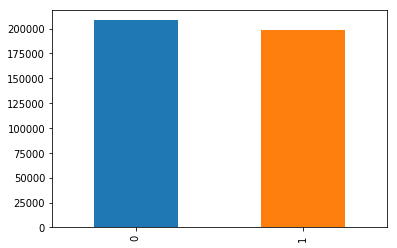

In [5]:
pd.value_counts(train['55']).plot(kind='bar')

In [18]:
def normalize(df, cols):
    norms = dict()
    for col in cols:
        norm = StandardScaler()
        norm.fit(np.array(df[col]).reshape(-1,1))
        df[col] = norm.transform(np.array(df[col]).reshape(-1, 1))
        norms[col] = norm
    return df, norms

In [21]:
def dump_csv(model, test_data, ids, filename):
    preds = model.predict_proba(test_data)
    first_col = preds[:, 1]
    df = pd.DataFrame.from_items([('key', ids), ('score', first_col)])
    df.to_csv(filename, index=False)
    print('CSV saved successfully')

In [32]:
def scores(model, val_x, val_y):
    yhat = model.predict(val_x)
    print(accuracy_score(yhat, val_y))
    print(roc_auc_score(yhat, val_y))

In [19]:
train_normed, norms = normalize(train.copy(), list(map(str, range(1, 11))))

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [40]:
norms

{'1': StandardScaler(copy=True, with_mean=True, with_std=True),
 '2': StandardScaler(copy=True, with_mean=True, with_std=True),
 '3': StandardScaler(copy=True, with_mean=True, with_std=True),
 '4': StandardScaler(copy=True, with_mean=True, with_std=True),
 '5': StandardScaler(copy=True, with_mean=True, with_std=True),
 '6': StandardScaler(copy=True, with_mean=True, with_std=True),
 '7': StandardScaler(copy=True, with_mean=True, with_std=True),
 '8': StandardScaler(copy=True, with_mean=True, with_std=True),
 '9': StandardScaler(copy=True, with_mean=True, with_std=True),
 '10': StandardScaler(copy=True, with_mean=True, with_std=True)}

In [20]:
train_normed.head()

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,447095,1.760238,-0.400681,1.056245,0.767481,2.868112,0.849060,1.490781,-0.675210,-1.792759,...,0,0,0,0,0,0,0,1,0,0
1,113427,0.477017,-0.543573,-0.681745,-0.685561,-0.676803,1.129632,0.817984,0.185496,-0.485918,...,0,0,0,0,0,0,0,0,0,1
2,66435,-1.460326,-0.847217,0.387787,-0.845442,-0.711054,-1.041279,0.705851,-1.080248,-1.165475,...,0,0,0,0,0,0,0,0,0,1
3,8957,-0.055573,-0.186344,-1.483895,0.753374,-0.574052,-0.309741,0.444208,0.742424,0.167502,...,0,0,0,0,0,0,0,0,0,1
4,434631,0.251828,1.528354,2.660543,0.033907,0.932965,-0.242481,-3.443060,-2.143474,1.239112,...,0,1,0,0,0,0,0,0,0,1


## Logistic Regression

In [22]:
logreg = LogisticRegression()

In [23]:
feat_cols = list(map(str, range(1, 55)))
X = train_normed[feat_cols]
y = train_normed['55']

In [26]:
x_train, x_val, y_train, y_val = train_test_split(X, y, random_state=45, test_size=0.2)

In [29]:
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
scores(logreg, x_val, y_val)

0.7565833148926754
0.7567381842474961


In [34]:
xgbc = XGBClassifier()

In [36]:
xgbc.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [37]:
scores(xgbc, x_val, y_val)

0.7839738388532369
0.7858537841580313


/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
